In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sys.path.append(os.getcwd())

In [4]:
df = pd.read_csv("data/imagem3.txt", delim_whitespace=True, header=None)
df.columns = ['y', 'x', 'label', 'ndai', 'sd', 'corr', 'ra_df', 'ra_cf', 'ra_bf', 'ra_af', 'ra_an']
df.sort_values(['x', 'y'], inplace=True)

In [56]:
from typing import NamedTuple, List, Tuple, Set, Generator
from cv_master import Coordinate, Grid2DKernel, Patch, Grid2D


class SatelliteImage:
    def __init__(self, df: pd.DataFrame, overlaying_grid: Grid2D):
        self.df = df
        self.grid = overlaying_grid
    
    def get_data_patch(self, patch: Patch) -> pd.DataFrame:
        """Map the image data to the corresponding patch coordinates"""
        df = self.df

        x_lb, x_ub = patch.x_bound
        y_lb, y_ub = patch.y_bound
        
        x_bound = (df.x >= x_lb) & (df.x <= x_ub)
        y_bound = (df.y >= y_lb) & (df.y <= y_ub)

        return df[x_bound & y_bound]
    
    def iter_train_validate(self):
        for i, j, patch in self.grid.iter_patches():
            validate = patch
            neighbors = self.grid.get_neighbors(i, j)
            train = self.grid.patch_set.difference(neighbors.union({validate}))

            yield train, validate

In [77]:
kernel = Grid2DKernel(20, 20)
grid = Grid2D(Coordinate(65, 2), Coordinate(369, 383), kernel)
image = SatelliteImage(df, grid)

In [78]:
gen = image.iter_train_validate()

In [139]:
train, val = next(gen)

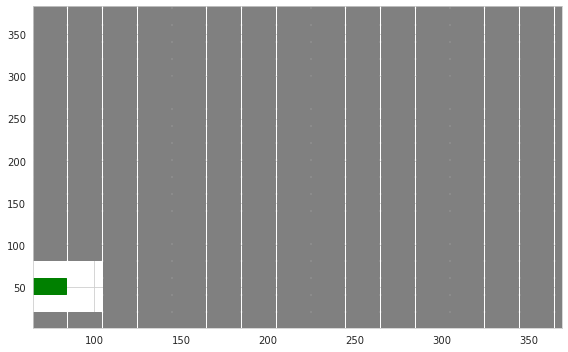

In [140]:
fig, ax = plt.subplots(figsize=(8, 5))
for patch in train:
    ax.add_patch(patch.to_matplotlib(color='grey'))

ax.add_patch(val.to_matplotlib(color='green'))
ax.set_xlim(*grid._patch.x_bound)
ax.set_ylim(*grid._patch.y_bound)

fig.tight_layout()
fig.show()